In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Collection usign Web Scrapping

In [27]:
import os, sys, json, random, time
import numpy as np, pandas as pd
from datetime import datetime
from tqdm import tqdm

import nltk, spacy, joblib
nltk.download('punkt'); nltk.download('stopwords'); nltk.download('wordnet'); nltk.download('averaged_perceptron_tagger')
try:
    nlp = spacy.load("en_core_web_sm")
except:
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")

SEED = 42
random.seed(SEED); np.random.seed(SEED)

CONFIG = {
    "target_apps": [
        # {"platform": "google_play", "id": "com.whatsapp", "friendly_name": "WhatsApp"},
        # {"platform": "google_play", "id": "com.instagram.android", "friendly_name": "Instagram"},
        # {"platform": "google_play", "id": "com.facebook.katana", "friendly_name": "Facebook"},
        # {"platform": "google_play", "id": "com.twitter.android", "friendly_name": "Twitter"},
        # {"platform": "google_play", "id": "com.snapchat.android", "friendly_name": "Snapchat"},
        # {"platform": "google_play", "id": "org.telegram.messenger", "friendly_name": "Telegram"},
        # {"platform": "google_play", "id": "com.discord", "friendly_name": "Discord"},
        # {"platform": "google_play", "id": "com.spotify.music", "friendly_name": "Spotify"},
        # {"platform": "google_play", "id": "com.soundcloud.android", "friendly_name": "SoundCloud"},
        # {"platform": "google_play", "id": "com.gaana", "friendly_name": "Gaana"},
        # {"platform": "google_play", "id": "com.shazam.android", "friendly_name": "Shazam"},
        # {"platform": "google_play", "id": "com.google.android.youtube", "friendly_name": "YouTube"},
        # {"platform": "google_play", "id": "com.netflix.mediaclient", "friendly_name": "Netflix"},
        # {"platform": "google_play", "id": "in.startv.hotstar", "friendly_name": "Hotstar"},
        # {"platform": "google_play", "id": "com.amazon.avod.thirdpartyclient", "friendly_name": "Prime Video"},
        # {"platform": "google_play", "id": "com.zhiliaoapp.musically", "friendly_name": "TikTok"},
        # {"platform": "google_play", "id": "com.amazon.mShop.android.shopping", "friendly_name": "Amazon Shopping"},
        # {"platform": "google_play", "id": "com.flipkart.android", "friendly_name": "Flipkart"},
        # {"platform": "google_play", "id": "com.myntra.android", "friendly_name": "Myntra"},
        # {"platform": "google_play", "id": "com.meesho.supply", "friendly_name": "Meesho"},
        # {"platform": "google_play", "id": "com.ebay.mobile", "friendly_name": "eBay"},
        # {"platform": "google_play", "id": "net.one97.paytm", "friendly_name": "Paytm"},
        # {"platform": "google_play", "id": "com.phonepe.app", "friendly_name": "PhonePe"},
        # {"platform": "google_play", "id": "com.google.android.apps.nbu.paisa.user", "friendly_name": "Google Pay"},
        # {"platform": "google_play", "id": "com.dreamplug.androidapp", "friendly_name": "Cred"},
        # {"platform": "google_play", "id": "com.nextbillion.groww", "friendly_name": "Groww"},
        # {"platform": "google_play", "id": "com.google.android.apps.docs", "friendly_name": "Google Drive"},
        # {"platform": "google_play", "id": "com.evernote", "friendly_name": "Evernote"},
        # {"platform": "google_play", "id": "com.microsoft.teams", "friendly_name": "Microsoft Teams"},
        # {"platform": "google_play", "id": "us.zoom.videomeetings", "friendly_name": "Zoom"},
        # {"platform": "google_play", "id": "com.myfitnesspal.android", "friendly_name": "MyFitnessPal"},
        # {"platform": "google_play", "id": "com.getsomeheadspace.android", "friendly_name": "Headspace"},
        {"platform": "google_play", "id": "com.ubercab", "friendly_name": "Uber"},
        {"platform": "google_play", "id": "com.olacabs.customer", "friendly_name": "Ola"},
        {"platform": "google_play", "id": "com.google.android.apps.maps", "friendly_name": "Google Maps"},
        {"platform": "google_play", "id": "com.booking", "friendly_name": "Booking.com"},
        {"platform": "google_play", "id": "com.makemytrip", "friendly_name": "MakeMyTrip"},
        {"platform": "google_play", "id": "com.tencent.ig", "friendly_name": "PUBG Mobile"},
        {"platform": "google_play", "id": "com.supercell.clashofclans", "friendly_name": "Clash of Clans"},
        {"platform": "google_play", "id": "com.king.candycrushsaga", "friendly_name": "Candy Crush"},
        {"platform": "google_play", "id": "com.dts.freefireth", "friendly_name": "Free Fire"},
        {"platform": "google_play", "id": "com.duolingo", "friendly_name": "Duolingo"},
        {"platform": "google_play", "id": "org.khanacademy.android", "friendly_name": "Khan Academy"},
        {"platform": "google_play", "id": "com.udemy.android", "friendly_name": "Udemy"},
        {"platform": "google_play", "id": "org.coursera.android", "friendly_name": "Coursera"},
    ],
    "reviews_per_app": 1000,
    "language": "en",
    "output_dir": "data"
}
os.makedirs(CONFIG["output_dir"], exist_ok=True)
print(f"Loaded {len(CONFIG['target_apps'])} target apps, {CONFIG['reviews_per_app']} reviews each.")



[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Loaded 13 target apps, 1000 reviews each.


In [28]:
from google_play_scraper import reviews as gp_reviews, Sort as gpSort

def exponential_backoff(attempt, base_delay=2.0, max_delay=60.0):
    delay = min(base_delay * (2 ** attempt) + random.uniform(0, 1), max_delay)
    time.sleep(delay)

def scrape_google_play(app_id, n_reviews=1000, lang='en'):
    all_reviews, token, attempt = [], None, 0
    while len(all_reviews) < n_reviews:
        try:
            batch, token = gp_reviews(app_id, lang=lang, count=min(200, n_reviews-len(all_reviews)),
                                      sort=gpSort.NEWEST, continuation_token=token)
            all_reviews.extend(batch)
            print(f"{app_id}: {len(all_reviews)} / {n_reviews}")
            if not token: break
            time.sleep(random.uniform(1,2))
        except Exception as e:
            print("Error:", e); exponential_backoff(attempt); attempt += 1
            if attempt>5: break
    return all_reviews

def scrape_reviews(platform, app_id, n_reviews=1000, lang='en'):
    if platform == "google_play": return scrape_google_play(app_id, n_reviews, lang)
    else: return []

In [29]:
from pathlib import Path
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

def normalize_reviews(platform, app_id, raw_reviews):
    """Normalize scraper output into standard schema"""
    return [{
        "platform": platform,
        "app_id": app_id,
        "review_id": r.get("reviewId"),
        "score": r.get("score"),
        "content": r.get("content"),
        "date": r.get("at").isoformat() if r.get("at") else None,
        "thumbs_up": r.get("thumbsUpCount"),
        "raw_meta": json.dumps(r, default=str)
    } for r in raw_reviews]


partial_path = Path(CONFIG["output_dir"]) / "raw_partial.csv"
if partial_path.exists():
    df_partial = pd.read_csv(partial_path)
    done_apps = df_partial["app_id"].unique().tolist()
    print(f" Found partial progress: {len(done_apps)} apps done. Resuming from next app...")
else:
    df_partial = pd.DataFrame()
    done_apps = []

all_reviews = df_partial.to_dict("records") if len(df_partial) else []
failed_apps = []

print(f"Starting scraping for {len(CONFIG['target_apps'])} apps...\n")

for app in CONFIG["target_apps"]:
    platform, app_id, name = app["platform"], app["id"], app["friendly_name"]

    if app_id in done_apps:
        print(f"Skipping {name} (already scraped earlier).")
        continue

    try:
        print(f"\n🚀 Scraping {name} ({app_id})...")
        raw = scrape_reviews(platform, app_id, n_reviews=CONFIG["reviews_per_app"])

        if not raw or len(raw) == 0:
            print(f"  Skipping {name}: No reviews fetched.")
            failed_apps.append(name)
            continue

        norm = normalize_reviews(platform, app_id, raw)
        all_reviews.extend(norm)
        done_apps.append(app_id)
        print(f" {name}: {len(norm)} reviews normalized.")

        if len(done_apps) % 3 == 0:
            df_partial = pd.DataFrame(all_reviews)
            df_partial.to_csv(partial_path, index=False, encoding="utf-8")
            print(f"💾 Progress saved ({len(done_apps)} apps completed).")

    except Exception as e:
        print(f" Error processing {name}: {e}")
        failed_apps.append(name)
        continue

df_raw = pd.DataFrame(all_reviews)
out_path = Path(CONFIG["output_dir"]) / f"raw_reviews_{timestamp}.csv"
df_raw.to_csv(out_path, index=False, encoding="utf-8")

print(f"\n Combined dataset: {len(df_raw)} reviews saved to {out_path}")
if failed_apps:
    print(f" Skipped apps ({len(failed_apps)}): {failed_apps[:10]}{'...' if len(failed_apps) > 10 else ''}")
else:
    print("All apps scraped successfully!")

print("\nPreview:")
print(df_raw.head(3))


 Found partial progress: 27 apps done. Resuming from next app...
Starting scraping for 13 apps...


🚀 Scraping Uber (com.ubercab)...
com.ubercab: 200 / 1000
com.ubercab: 400 / 1000
com.ubercab: 600 / 1000
com.ubercab: 800 / 1000
com.ubercab: 1000 / 1000
 Uber: 1000 reviews normalized.

🚀 Scraping Ola (com.olacabs.customer)...
com.olacabs.customer: 200 / 1000
com.olacabs.customer: 400 / 1000
com.olacabs.customer: 600 / 1000
com.olacabs.customer: 800 / 1000
com.olacabs.customer: 1000 / 1000
 Ola: 1000 reviews normalized.

🚀 Scraping Google Maps (com.google.android.apps.maps)...
com.google.android.apps.maps: 200 / 1000
com.google.android.apps.maps: 400 / 1000
com.google.android.apps.maps: 600 / 1000
com.google.android.apps.maps: 800 / 1000
com.google.android.apps.maps: 1000 / 1000
 Google Maps: 1000 reviews normalized.
💾 Progress saved (30 apps completed).

🚀 Scraping Booking.com (com.booking)...
com.booking: 200 / 1000
com.booking: 400 / 1000
com.booking: 600 / 1000
com.booking: 800 / 10

# Data Pre-Processign and Data analysis

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loaded raw dataset: (40000, 8)
Cleaning text... (this may take a few minutes for 40k reviews)
 Cleaned dataset saved: data/cleaned_reviews.csv
Final shape: (39998, 7)
      platform        app_id  score  \
0  google_play  com.whatsapp      5   
1  google_play  com.whatsapp      1   
2  google_play  com.whatsapp      5   
3  google_play  com.whatsapp      5   
4  google_play  com.whatsapp      2   

                                             content                 date  \
0                    please my whatsapp number unban  2025-11-11T07:19:08   
1  very worst because it's was again restricted i...  2025-11-11T07:19:08   
2  The recently added "channel" feature in the ap...  2025-11-11T07:19:01   
3                                       very cowered  2025-11-11T07:18:09   
4                                                not  2025-11-11T07:17:15   

                                       content_clean sentiment  
0                       please whatsapp number unban  positive  
1  wo

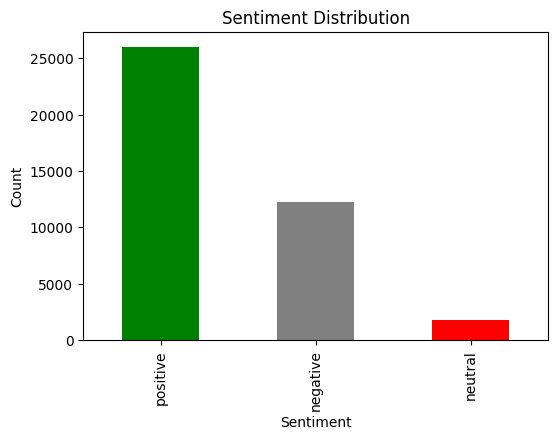

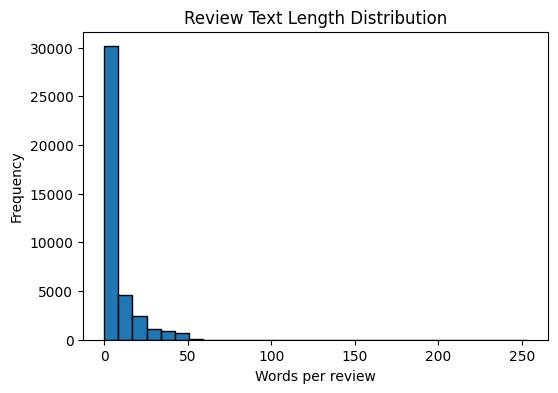

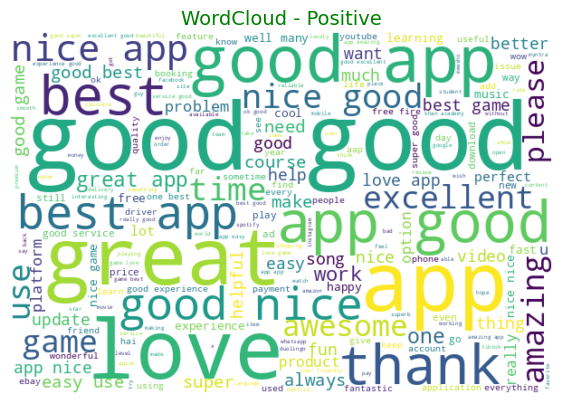

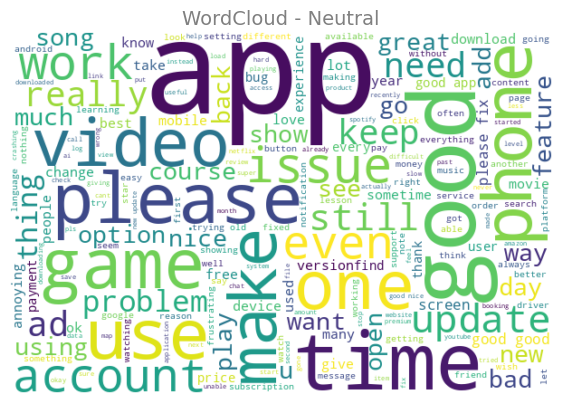

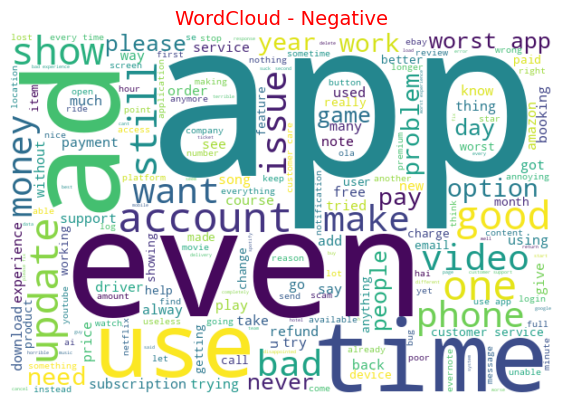

In [30]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')

df_raw = pd.read_csv("data/raw_reviews_20251112_074322.csv")
print("Loaded raw dataset:", df_raw.shape)


cols_to_drop = ["raw_meta", "review_id", "thumbs_up"]
df = df_raw.drop(columns=cols_to_drop, errors="ignore")

df = df.dropna(subset=["content"])
df = df[df["content"].str.strip() != ""]


STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text) 
    text = re.sub(r"<.*?>", "", text)                  
    text = re.sub(r"[^a-z\s]", " ", text)               
    text = re.sub(r"\s+", " ", text).strip()          
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in STOPWORDS]
    return " ".join(tokens)

print("Cleaning text... (this may take a few minutes for 40k reviews)")
df["content_clean"] = df["content"].astype(str).apply(clean_text)


def label_sentiment(score):
    if pd.isna(score):
        return None
    score = int(score)
    if score >= 4:
        return "positive"
    elif score == 3:
        return "neutral"
    else:
        return "negative"

df["sentiment"] = df["score"].apply(label_sentiment)
df = df.dropna(subset=["sentiment"])


clean_path = "data/cleaned_reviews.csv"
df.to_csv(clean_path, index=False, encoding="utf-8")
print(f" Cleaned dataset saved: {clean_path}")
print("Final shape:", df.shape)
print(df.head(5))


sentiment_counts = df["sentiment"].value_counts()
print("\nSentiment distribution:")
print(sentiment_counts)

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

df["text_length"] = df["content_clean"].apply(lambda x: len(x.split()))
plt.figure(figsize=(6,4))
plt.hist(df["text_length"], bins=30, edgecolor="black")
plt.title("Review Text Length Distribution")
plt.xlabel("Words per review")
plt.ylabel("Frequency")
plt.show()

for label, color in zip(["positive", "neutral", "negative"], ["green", "gray", "red"]):
    text = " ".join(df[df["sentiment"] == label]["content_clean"].values)
    if len(text) < 50:
        continue
    wc = WordCloud(width=600, height=400, background_color="white", colormap=None).generate(text)
    plt.figure(figsize=(7,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud - {label.capitalize()}", fontsize=14, color=color)
    plt.show()


# Inference Function for Classical Model

**Here we will train Logistic regression, Linear Support Vection Machine and naive Bayes**

Loaded cleaned dataset: (39998, 7)
After cleaning: (38772, 7)
Train: 31017, Test: 7755
TF-IDF matrix shape: (31017, 10000)

🧠 Training Logistic Regression...
Logistic Regression Accuracy: 0.8674
              precision    recall  f1-score   support

    negative       0.82      0.83      0.82      2403
     neutral       0.40      0.01      0.01       340
    positive       0.89      0.94      0.92      5012

    accuracy                           0.87      7755
   macro avg       0.70      0.59      0.58      7755
weighted avg       0.85      0.87      0.85      7755


🧠 Training Linear SVM...
Linear SVM Accuracy: 0.8576
              precision    recall  f1-score   support

    negative       0.81      0.81      0.81      2403
     neutral       0.22      0.03      0.05       340
    positive       0.88      0.94      0.91      5012

    accuracy                           0.86      7755
   macro avg       0.64      0.59      0.59      7755
weighted avg       0.83      0.86      0.84 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


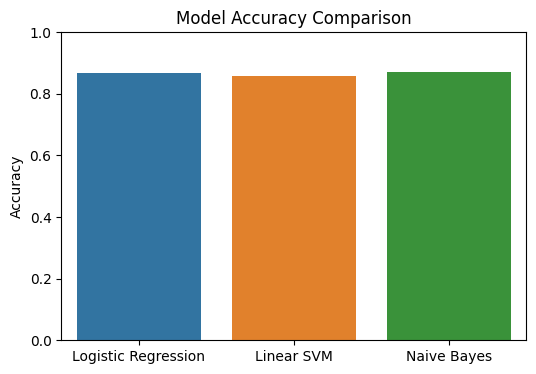


 Best Model: Naive Bayes (0.8701)
 Saved vectorizer and Naive Bayes model artifacts to /data


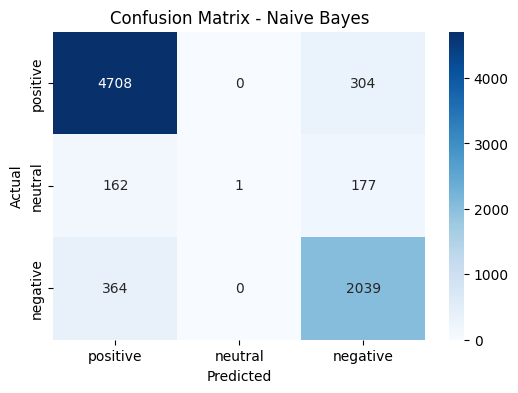

In [32]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("data/cleaned_reviews.csv")
print("Loaded cleaned dataset:", df.shape)


df = df.dropna(subset=["content_clean", "sentiment"])
df = df[df["content_clean"].astype(str).str.strip() != ""]
df["content_clean"] = df["content_clean"].astype(str)

print("After cleaning:", df.shape)

X = df["content_clean"].values
y = df["sentiment"].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train: {len(X_train)}, Test: {len(X_test)}")


vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    sublinear_tf=True
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print("TF-IDF matrix shape:", X_train_vec.shape)


models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Linear SVM": LinearSVC(),
    "Naive Bayes": MultinomialNB()
}

results = {}
for name, model in models.items():
    print(f"\n🧠 Training {name}...")
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    results[name] = acc


plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n Best Model: {best_model_name} ({results[best_model_name]:.4f})")

joblib.dump(vectorizer, f"data/tfidf_vectorizer.joblib")
joblib.dump(best_model, f"data/{best_model_name.replace(' ', '_').lower()}_model.joblib")
print(f" Saved vectorizer and {best_model_name} model artifacts to /data")


y_pred_best = best_model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred_best, labels=["positive", "neutral", "negative"])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["positive","neutral","negative"], yticklabels=["positive","neutral","negative"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


**Here as you can see naive bayes got highest accuracy**

# Testing Naive Bayes model

In [33]:
import joblib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


vectorizer = joblib.load("data/tfidf_vectorizer.joblib")
model = joblib.load("data/naive_bayes_model.joblib")  

STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in STOPWORDS]
    return " ".join(tokens)


def predict_sentiment(text):
    if not text or not isinstance(text, str):
        return "Invalid input"
    clean = clean_text(text)
    vec = vectorizer.transform([clean])
    pred = model.predict(vec)[0]
    probs = None
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(vec)[0]
    label = pred.capitalize()
    print(f"\n Input Review: {text}")
    print(f" Cleaned: {clean}")
    print(f" Predicted Sentiment: {label}")
    if probs is not None:
        print(f"Confidence: {dict(zip(model.classes_, [round(p,3) for p in probs]))}")
    return label


while True:
    user_input = input("\nEnter a review (or type 'exit' to quit): ")
    if user_input.lower() == "exit":
        print("Session ended.")
        break
    predict_sentiment(user_input)



Enter a review (or type 'exit' to quit):  The game has serious optimization issues. Even on my high-end phone (you can insert your phone model here), I constantly experience lag, frame drops, and random crashes. ​The biggest disappointment is the growing number of hackers. It feels like there's a hacker in almost every other match, which completely ruins the experience. Reporting them seems to have little to no effect. ​On top of that, the servers are often unstable, leading to extremely high ping. With all these problems combined, the



 Input Review: The game has serious optimization issues. Even on my high-end phone (you can insert your phone model here), I constantly experience lag, frame drops, and random crashes. ​The biggest disappointment is the growing number of hackers. It feels like there's a hacker in almost every other match, which completely ruins the experience. Reporting them seems to have little to no effect. ​On top of that, the servers are often unstable, leading to extremely high ping. With all these problems combined, the
 Cleaned: game serious optimization issue even high end phone insert phone model constantly experience lag frame drop random crash biggest disappointment growing number hacker feel like hacker almost every match completely ruin experience reporting seems little effect top server often unstable leading extremely high ping problem combined
 Predicted Sentiment: Negative
Confidence: {'negative': 0.921, 'neutral': 0.043, 'positive': 0.036}



Enter a review (or type 'exit' to quit):  BGMI offers a thrilling and engaging battle royale experience that's sure to keep you hooked. The graphics are impressive, and the gameplay is smooth, making it a top choice for fans of the genre. The variety of maps and game modes ensures there's always something new to try. Overall, BGMI is a fantastic game!! Sometimes there is a glitch, otherwise the game is the besttt!!!!! 🥰



 Input Review: BGMI offers a thrilling and engaging battle royale experience that's sure to keep you hooked. The graphics are impressive, and the gameplay is smooth, making it a top choice for fans of the genre. The variety of maps and game modes ensures there's always something new to try. Overall, BGMI is a fantastic game!! Sometimes there is a glitch, otherwise the game is the besttt!!!!! 🥰
 Cleaned: bgmi offer thrilling engaging battle royale experience sure keep hooked graphic impressive gameplay smooth making top choice fan genre variety map game mode ensures always something new try overall bgmi fantastic game sometimes glitch otherwise game besttt
 Predicted Sentiment: Positive
Confidence: {'negative': 0.012, 'neutral': 0.003, 'positive': 0.984}



Enter a review (or type 'exit' to quit):  dear BGMI, all your updates are very good but there is some glitch with them, sometimes the control shifts from 4 fingers to 2 fingers, sometimes the players' voice is not heard and sometimes something else. But this time the glitch is different, the players' voice echoes, whenever they say something, it is heard 4-5 times, even if it is a gun fire. Due to which we cannot know when the enemy is coming in the game, that is why we do not enjoy playing the game, please fix this problem as quickly



 Input Review: dear BGMI, all your updates are very good but there is some glitch with them, sometimes the control shifts from 4 fingers to 2 fingers, sometimes the players' voice is not heard and sometimes something else. But this time the glitch is different, the players' voice echoes, whenever they say something, it is heard 4-5 times, even if it is a gun fire. Due to which we cannot know when the enemy is coming in the game, that is why we do not enjoy playing the game, please fix this problem as quickly
 Cleaned: dear bgmi update good glitch sometimes control shift finger finger sometimes player voice heard sometimes something else time glitch different player voice echo whenever say something heard time even gun fire due cannot know enemy coming game enjoy playing game please fix problem quickly
 Predicted Sentiment: Negative
Confidence: {'negative': 0.532, 'neutral': 0.031, 'positive': 0.438}



Enter a review (or type 'exit' to quit):  dear BGMI, all your updates are very good but there is some glitch with them, sometimes the control shifts from 4 fingers to 2 fingers, sometimes the players' voice is not heard and sometimes something else. But this time the glitch is different, the players' voice echoes, whenever they say something, it is heard 4-5 times, even if it is a gun fire. Due to which we cannot know when the enemy is coming in the game, that is why we do not enjoy playing the game, please fix this problem as quickly



 Input Review: dear BGMI, all your updates are very good but there is some glitch with them, sometimes the control shifts from 4 fingers to 2 fingers, sometimes the players' voice is not heard and sometimes something else. But this time the glitch is different, the players' voice echoes, whenever they say something, it is heard 4-5 times, even if it is a gun fire. Due to which we cannot know when the enemy is coming in the game, that is why we do not enjoy playing the game, please fix this problem as quickly
 Cleaned: dear bgmi update good glitch sometimes control shift finger finger sometimes player voice heard sometimes something else time glitch different player voice echo whenever say something heard time even gun fire due cannot know enemy coming game enjoy playing game please fix problem quickly
 Predicted Sentiment: Negative
Confidence: {'negative': 0.532, 'neutral': 0.031, 'positive': 0.438}



Enter a review (or type 'exit' to quit):  The game is becoming trash day by day. The ping is always high, frame freezing, slow rendering is almost becoming a daily routine. Can't see enemies, don't know whether the jump button is working or not as the frame is freezed inside a room and after a while HP goes down. Without launching new mode please take care about the server response, because the rendering issue is high enough to cause someone irritated and finally stops the game forever. 29,466 people found this review helpful



 Input Review: The game is becoming trash day by day. The ping is always high, frame freezing, slow rendering is almost becoming a daily routine. Can't see enemies, don't know whether the jump button is working or not as the frame is freezed inside a room and after a while HP goes down. Without launching new mode please take care about the server response, because the rendering issue is high enough to cause someone irritated and finally stops the game forever. 29,466 people found this review helpful
 Cleaned: game becoming trash day day ping always high frame freezing slow rendering almost becoming daily routine see enemy know whether jump button working frame freezed inside room hp go without launching new mode please take care server response rendering issue high enough cause someone irritated finally stop game forever people found review helpful
 Predicted Sentiment: Negative
Confidence: {'negative': 0.923, 'neutral': 0.02, 'positive': 0.057}



Enter a review (or type 'exit' to quit):  BGMI delivers a thrilling and largely authentic battle royale experience on mobile. The core gameplay is addictive, offering intense firefights and strategic depth across a variety of maps. The controls are generally well-optimized for touchscreens, allowing for decent maneuverability and aiming.However, the game isn't without its drawbacks. Occasional lag or frame rate drops can disrupt gameplay, especially during intense moments.



 Input Review: BGMI delivers a thrilling and largely authentic battle royale experience on mobile. The core gameplay is addictive, offering intense firefights and strategic depth across a variety of maps. The controls are generally well-optimized for touchscreens, allowing for decent maneuverability and aiming.However, the game isn't without its drawbacks. Occasional lag or frame rate drops can disrupt gameplay, especially during intense moments.
 Cleaned: bgmi delivers thrilling largely authentic battle royale experience mobile core gameplay addictive offering intense firefights strategic depth across variety map control generally well optimized touchscreen allowing decent maneuverability aiming however game without drawback occasional lag frame rate drop disrupt gameplay especially intense moment
 Predicted Sentiment: Positive
Confidence: {'negative': 0.091, 'neutral': 0.084, 'positive': 0.825}



Enter a review (or type 'exit' to quit):  🥹💔BGMI offers a thrilling and engaging battle royale experience that's sure to keep you hooked. The graphics are impressive, and the gameplay is smooth, making it a top choice for fans of the genre. The variety of maps and game modes ensures there's always something new to try. Overall, BGMI is a fantastic game!! Sometimes there is a glitch, otherwise the game is the besttt!!!!💔🥹



 Input Review: 🥹💔BGMI offers a thrilling and engaging battle royale experience that's sure to keep you hooked. The graphics are impressive, and the gameplay is smooth, making it a top choice for fans of the genre. The variety of maps and game modes ensures there's always something new to try. Overall, BGMI is a fantastic game!! Sometimes there is a glitch, otherwise the game is the besttt!!!!💔🥹
 Cleaned: bgmi offer thrilling engaging battle royale experience sure keep hooked graphic impressive gameplay smooth making top choice fan genre variety map game mode ensures always something new try overall bgmi fantastic game sometimes glitch otherwise game besttt
 Predicted Sentiment: Positive
Confidence: {'negative': 0.012, 'neutral': 0.003, 'positive': 0.984}



Enter a review (or type 'exit' to quit):  exit


Session ended.


# Deep Learning Model (Bidirectional LSTM)

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import joblib


df = pd.read_csv("data/cleaned_reviews.csv")
df = df.dropna(subset=["content_clean", "sentiment"])
df = df[df["content_clean"].astype(str).str.strip() != ""]

label_map = {"negative": 0, "neutral": 1, "positive": 2}
df["label"] = df["sentiment"].map(label_map)

X = df["content_clean"].astype(str).values
y = df["label"].values


MAX_WORDS = 20000       
MAX_LEN = 100           

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=MAX_LEN, padding='post', truncating='post')

2025-11-12 08:07:32.657665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762934852.895087      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762934852.958086      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42, stratify=y)


model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1762934876.673432      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,               
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/5


I0000 00:00:1762934898.692343     171 cuda_dnn.cc:529] Loaded cuDNN version 90300


243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7629 - loss: 0.6173 - val_accuracy: 0.8698 - val_loss: 0.4079
Epoch 2/5
243/243 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8895 - loss: 0.3744 - val_accuracy: 0.8690 - val_loss: 0.4135
Epoch 3/5
243/243 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9034 - loss: 0.3239 - val_accuracy: 0.8656 - val_loss: 0.4256
Epoch 4/5
243/243 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9162 - loss: 0.2779 - val_accuracy: 0.8544 - val_loss: 0.4669


In [37]:

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nLSTM Model Accuracy: {acc:.4f}")

model.save("data/lstm_sentiment_model.h5")
joblib.dump(tokenizer, "data/lstm_tokenizer.pkl")

print("\nSaved LSTM model to data/lstm_sentiment_model.h5")
print("Saved tokenizer to data/lstm_tokenizer.pkl")



LSTM Model Accuracy: 0.8698

Saved LSTM model to data/lstm_sentiment_model.h5
Saved tokenizer to data/lstm_tokenizer.pkl


# Real-time Prediction for Deep (LSTM) Model

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


model = tf.keras.models.load_model("data/lstm_sentiment_model.h5")
tokenizer = joblib.load("data/lstm_tokenizer.pkl")

label_map_rev = {0: "Negative", 1: "Neutral", 2: "Positive"}

STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in STOPWORDS]
    return " ".join(tokens)


def predict_sentiment_lstm(text, max_len=100):
    if not text or not isinstance(text, str):
        return "Invalid input"
    
    clean = clean_text(text)
    seq = tokenizer.texts_to_sequences([clean])
    pad = pad_sequences(seq, maxlen=max_len, padding="post", truncating="post")
    
    preds = model.predict(pad)
    label_idx = np.argmax(preds, axis=1)[0]
    confidence = preds[0][label_idx]
    sentiment = label_map_rev[label_idx]
    
    print("\n Input Review:", text)
    print(" Cleaned:", clean)
    print(f" Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")
    print(f"Raw probabilities: Negative={preds[0][0]:.2f}, Neutral={preds[0][1]:.2f}, Positive={preds[0][2]:.2f}")
    return sentiment


while True:
    user_input = input("\nEnter a review for LSTM model (or type 'exit' to quit): ")
    if user_input.lower() == "exit":
        print("Session ended.")
        break
    predict_sentiment_lstm(user_input)



Enter a review for LSTM model (or type 'exit' to quit):  BGMI offers a thrilling and engaging batle royale experience that's sure to keep you hooked. The graphics are impressive, and the gameplay is smooth, making it a top choice for fans of the genre. The variety of maps and game modes ensures there's always something new to try. Overall, BGMl is a fantastic game!! Sometimes there is a glitch, otherwise the game is the bestt!!!!e


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step

 Input Review: BGMI offers a thrilling and engaging batle royale experience that's sure to keep you hooked. The graphics are impressive, and the gameplay is smooth, making it a top choice for fans of the genre. The variety of maps and game modes ensures there's always something new to try. Overall, BGMl is a fantastic game!! Sometimes there is a glitch, otherwise the game is the bestt!!!!e
 Cleaned: bgmi offer thrilling engaging batle royale experience sure keep hooked graphic impressive gameplay smooth making top choice fan genre variety map game mode ensures always something new try overall bgml fantastic game sometimes glitch otherwise game bestt e
 Predicted Sentiment: Positive (Confidence: 0.72)
Raw probabilities: Negative=0.20, Neutral=0.08, Positive=0.72



Enter a review for LSTM model (or type 'exit' to quit):  BGMl offers a thrilling and engaging battle royale experience that's sure to keep you hooked. The graphics are impressive, and the gameplay is smooth, making it a top choice for fans of the genre. The variety of maps and game modes ensures there's always something new to try. Overall, BGMll is a fantastic game!! Sometimes there is a glitch, otherwise the game is the besttt!!!!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

 Input Review: BGMl offers a thrilling and engaging battle royale experience that's sure to keep you hooked. The graphics are impressive, and the gameplay is smooth, making it a top choice for fans of the genre. The variety of maps and game modes ensures there's always something new to try. Overall, BGMll is a fantastic game!! Sometimes there is a glitch, otherwise the game is the besttt!!!!
 Cleaned: bgml offer thrilling engaging battle royale experience sure keep hooked graphic impressive gameplay smooth making top choice fan genre variety map game mode ensures always something new try overall bgmll fantastic game sometimes glitch otherwise game besttt
 Predicted Sentiment: Positive (Confidence: 0.83)
Raw probabilities: Negative=0.12, Neutral=0.06, Positive=0.83



Enter a review for LSTM model (or type 'exit' to quit):  BGMI offers a thrilling and engaging battle royale experience that's sure to keep you hooked. The graphics are impressive, and the gameplay is smooth, making it a top choice for fans of the genre. The variety of maps and game modes ensures there's always something new to try. Overall, BGMI is a fantastic game!! Sometimes there is a glitch, otherwise the game is the besttt!!!!! 🥰


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

 Input Review: BGMI offers a thrilling and engaging battle royale experience that's sure to keep you hooked. The graphics are impressive, and the gameplay is smooth, making it a top choice for fans of the genre. The variety of maps and game modes ensures there's always something new to try. Overall, BGMI is a fantastic game!! Sometimes there is a glitch, otherwise the game is the besttt!!!!! 🥰
 Cleaned: bgmi offer thrilling engaging battle royale experience sure keep hooked graphic impressive gameplay smooth making top choice fan genre variety map game mode ensures always something new try overall bgmi fantastic game sometimes glitch otherwise game besttt
 Predicted Sentiment: Positive (Confidence: 0.77)
Raw probabilities: Negative=0.16, Neutral=0.07, Positive=0.77



Enter a review for LSTM model (or type 'exit' to quit):  I played Pubg mobile in its initial days where this was dark, gritty, tense and nerve racking but now its cartoonish, stupid and boring. Hope it can become what it used to be. KRAFTON you've made enough money now please can we go back to its original form.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

 Input Review: I played Pubg mobile in its initial days where this was dark, gritty, tense and nerve racking but now its cartoonish, stupid and boring. Hope it can become what it used to be. KRAFTON you've made enough money now please can we go back to its original form.
 Cleaned: played pubg mobile initial day dark gritty tense nerve racking cartoonish stupid boring hope become used krafton made enough money please go back original form
 Predicted Sentiment: Negative (Confidence: 0.57)
Raw probabilities: Negative=0.57, Neutral=0.15, Positive=0.28



Enter a review for LSTM model (or type 'exit' to quit):  exit


Session ended.


# Compare Classical vs LSTM Model Performance

Naive Bayes Accuracy: 0.8701
              precision    recall  f1-score   support

    negative       0.81      0.85      0.83      2403
     neutral       1.00      0.00      0.01       340
    positive       0.90      0.94      0.92      5012

    accuracy                           0.87      7755
   macro avg       0.90      0.60      0.58      7755
weighted avg       0.88      0.87      0.85      7755


 LSTM Accuracy: 0.8698
              precision    recall  f1-score   support

    negative       0.81      0.85      0.83      2403
     neutral       0.00      0.00      0.00       340
    positive       0.90      0.94      0.92      5012

    accuracy                           0.87      7755
   macro avg       0.57      0.60      0.58      7755
weighted avg       0.83      0.87      0.85      7755



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


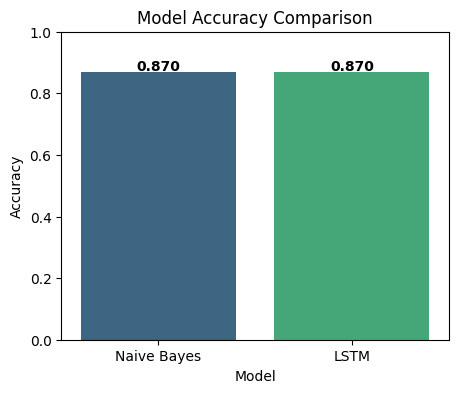

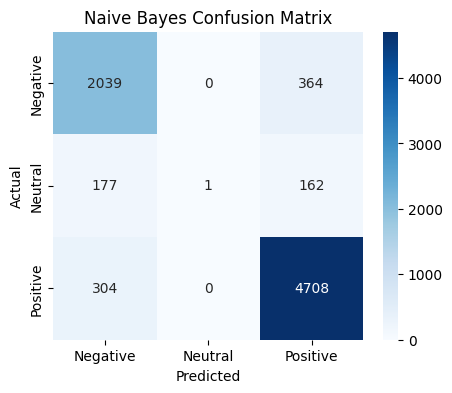

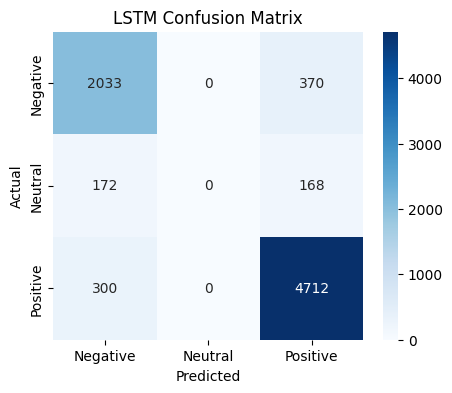

ValueError: Mix of label input types (string and number)

In [41]:
import joblib, tensorflow as tf, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences


vectorizer = joblib.load("data/tfidf_vectorizer.joblib")
nb_model   = joblib.load("data/naive_bayes_model.joblib")
lstm_model = tf.keras.models.load_model("data/lstm_sentiment_model.h5")
tokenizer  = joblib.load("data/lstm_tokenizer.pkl")


df = pd.read_csv("data/cleaned_reviews.csv")
df = df.dropna(subset=["content_clean", "sentiment"])
df = df[df["content_clean"].astype(str).str.strip() != ""]

label_map = {"negative":0, "neutral":1, "positive":2}
rev_map   = {0:"negative",1:"neutral",2:"positive"}

X = df["content_clean"].astype(str).values
y = df["sentiment"].map(label_map).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


X_test_vec = vectorizer.transform(X_test)
y_pred_nb = nb_model.predict(X_test_vec)

map_to_num = {"negative":0, "neutral":1, "positive":2}
y_pred_nb_num = np.array([map_to_num.get(lbl, 1) for lbl in y_pred_nb])  # default to neutral if missing

acc_nb = accuracy_score(y_test, y_pred_nb_num)
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
print(classification_report(y_test, y_pred_nb_num, target_names=["negative","neutral","positive"]))


MAX_LEN = 100
seq_test = tokenizer.texts_to_sequences(X_test)
pad_test = pad_sequences(seq_test, maxlen=MAX_LEN, padding='post', truncating='post')
preds_lstm = lstm_model.predict(pad_test, verbose=0)
y_pred_lstm = np.argmax(preds_lstm, axis=1)
acc_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"\n LSTM Accuracy: {acc_lstm:.4f}")
print(classification_report(y_test, y_pred_lstm, target_names=["negative","neutral","positive"]))



scores = pd.DataFrame({
    "Model": ["Naive Bayes", "LSTM"],
    "Accuracy": [acc_nb, acc_lstm]
})

plt.figure(figsize=(5,4))
sns.barplot(data=scores, x="Model", y="Accuracy", palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
for i, v in enumerate(scores["Accuracy"]):
    plt.text(i, v+0.005, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()


def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True, fmt='d', cmap='Blues',
        xticklabels=["Negative","Neutral","Positive"],
        yticklabels=["Negative","Neutral","Positive"]
    )
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion(y_test, y_pred_nb_num, "Naive Bayes Confusion Matrix")
plot_confusion(y_test, y_pred_lstm, "LSTM Confusion Matrix")



prec_nb, rec_nb, f1_nb, _ = precision_recall_fscore_support(y_test, y_pred_nb, average='weighted')
prec_lstm, rec_lstm, f1_lstm, _ = precision_recall_fscore_support(y_test, y_pred_lstm, average='weighted')

summary = pd.DataFrame({
    "Model": ["Naive Bayes", "LSTM"],
    "Accuracy": [acc_nb, acc_lstm],
    "Precision": [prec_nb, prec_lstm],
    "Recall": [rec_nb, rec_lstm],
    "F1-score": [f1_nb, f1_lstm]
}).round(4)

print("\n Model Comparison Summary:")
display(summary)
